#  import libraries

##  import training and testing data, then concate them together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv('train.csv',index_col='Id')
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 80)

In [4]:
df_test = pd.read_csv('test.csv',index_col='Id')
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_test.shape

(1459, 79)

In [6]:
df=pd.concat([df_train,df_test])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.shape

(2919, 80)

In [8]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [9]:
df.SalePrice.isnull().value_counts()

False    1460
True     1459
Name: SalePrice, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

#  Data exploration and preprocessing

##  Correct data types for features

In [11]:
cols=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
     'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold','GarageYrBlt','YearBuilt',\
     'YearRemodAdd']

In [12]:
for col in cols:
    df[col] = df[col].astype(object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null object
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null object
BsmtHalfBath     2917 non-null object
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918

##  Explore outliers of numeric feature

In [14]:
num_df=df.select_dtypes(include=[np.number])
num_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GrLivArea', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'PoolArea', 'SalePrice', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

In [15]:
num_df.iloc[:5,:5]

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2
Id,,,,,
1,856,854,0,706.0,0.0
2,1262,0,0,978.0,0.0
3,920,866,0,486.0,0.0
4,961,756,0,216.0,0.0
5,1145,1053,0,655.0,0.0


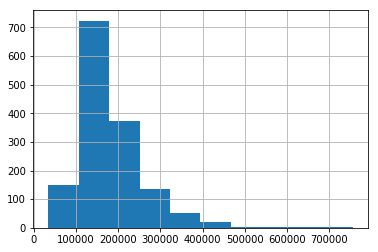

In [16]:
num_df['SalePrice'].hist()

In [17]:
num_df[num_df['SalePrice']>500000]

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF
Id,,,,,,,,,,,,,,,,,,,,
179,2234,0,0,1904.0,0.0,312.0,0,1166.0,2234,17423,63.0,0,748.0,0,60,0,501837.0,0,2216.0,0
441,2402,0,0,1767.0,539.0,788.0,0,672.0,2402,15431,105.0,0,200.0,0,72,0,555000.0,170,3094.0,0
692,2444,1872,0,1455.0,0.0,989.0,0,832.0,4316,21535,104.0,0,1170.0,0,50,0,755000.0,0,2444.0,382
770,1690,1589,0,1416.0,0.0,234.0,0,841.0,3279,53504,47.0,0,603.0,0,36,0,538000.0,210,1650.0,503
804,1734,1088,0,0.0,0.0,1734.0,0,1020.0,2822,13891,107.0,0,424.0,0,170,0,582933.0,192,1734.0,52
899,2364,0,0,2188.0,0.0,142.0,0,820.0,2364,12919,100.0,0,760.0,0,67,0,611657.0,0,2330.0,0
1047,1992,876,0,240.0,0.0,1752.0,0,716.0,2868,16056,85.0,0,208.0,0,108,0,556581.0,0,1992.0,214
1170,1831,1796,0,1387.0,0.0,543.0,0,807.0,3627,35760,118.0,0,1378.0,0,76,0,625000.0,0,1930.0,361
1183,2411,2065,0,2096.0,0.0,300.0,0,813.0,4476,15623,160.0,0,0.0,0,78,555,745000.0,0,2396.0,171


* How can I plot all of these numeric features in one line. 
* I've tried to put all of them in the x_vars, but some features didn't work.


* I replaced all the values of outliers with Nan, then I call fill it later

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


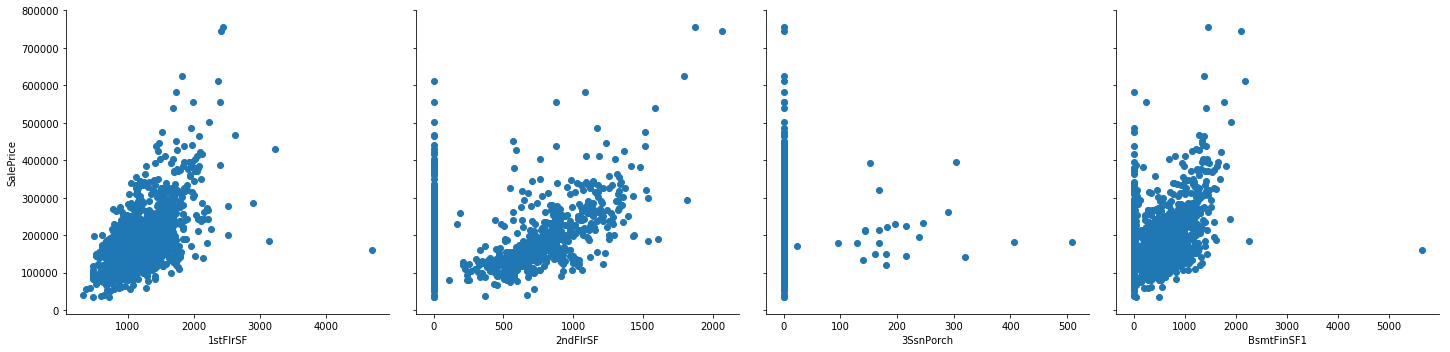

In [18]:
g = sns.pairplot(num_df, y_vars=['SalePrice'], x_vars=['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1'],size=5)
g.map(plt.scatter)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


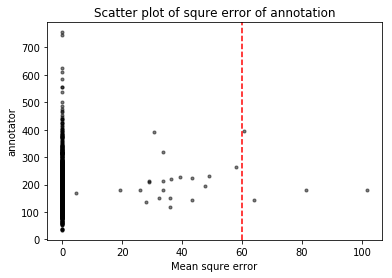

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = num_df['3SsnPorch']/5
y = num_df['SalePrice']/1000
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot of squre error of annotation')
plt.xlabel('Mean squre error')
plt.ylabel('annotator')
plt.axvline(x=60,color='r',linestyle='--')
#plt.xlim(0,1)
plt.show()


In [19]:
type(np.NaN)

float

In [20]:
df.loc[df['1stFlrSF']>4000,'1stFlrSF']=np.NaN
df.loc[df['1stFlrSF']>4000,'1stFlrSF']
df.loc[df['BsmtFinSF1']>5000,'BsmtFinSF1']=np.NaN

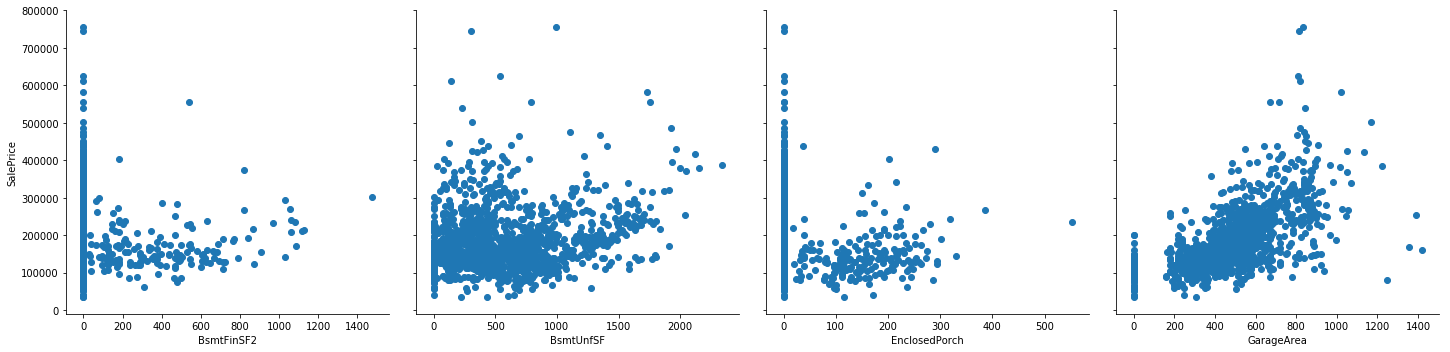

In [21]:
g = sns.pairplot(num_df, y_vars=['SalePrice'], x_vars=['BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea'],size=5)
g.map(plt.scatter)

In [22]:
df.loc[df['BsmtFinSF2']>1400,'BsmtFinSF2']=np.NaN
df.loc[df['EnclosedPorch']>500,'EnclosedPorch']=np.NaN

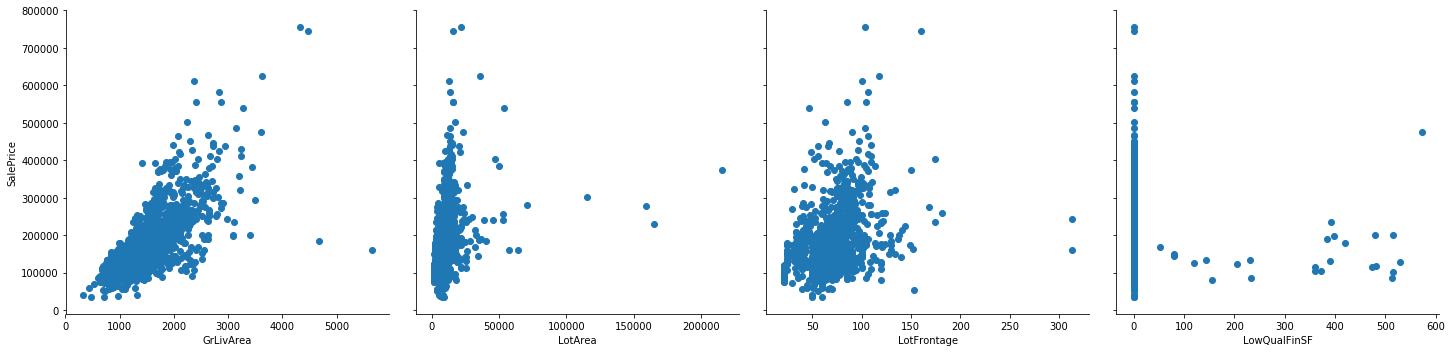

In [23]:
g = sns.pairplot(num_df, y_vars=['SalePrice'], x_vars=['GrLivArea', 'LotArea',
       'LotFrontage', 'LowQualFinSF'],size=5)
g.map(plt.scatter)

In [24]:
df.loc[df['GrLivArea']>5000,'GrLivArea']=np.NaN
df.loc[df['LotFrontage']>300,'LotFrontage']=np.NaN

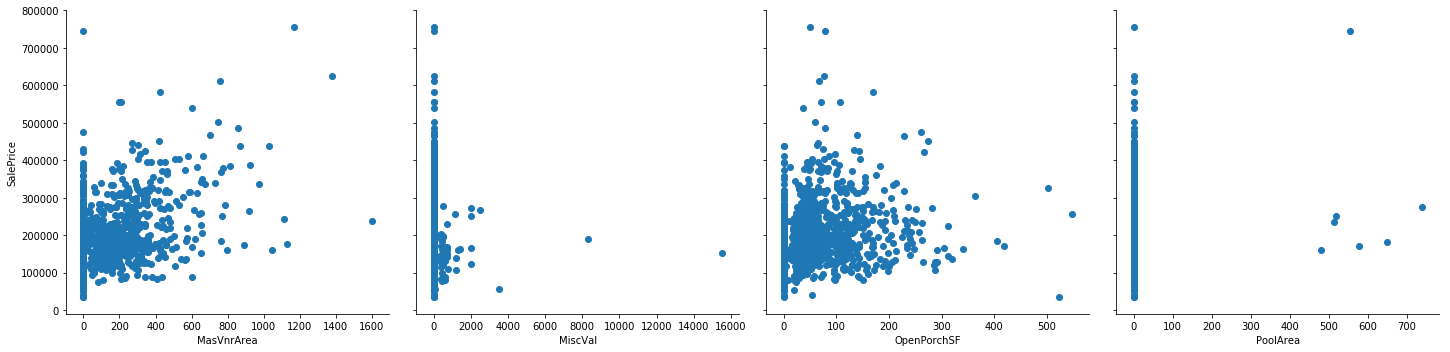

In [25]:
g = sns.pairplot(num_df, y_vars=['SalePrice'], x_vars=['MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'PoolArea'],size=5)
g.map(plt.scatter)

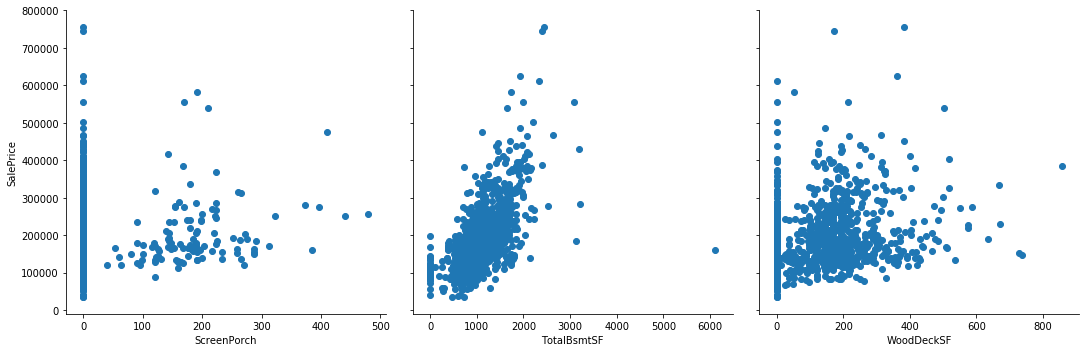

In [26]:
g = sns.pairplot(num_df, y_vars=['SalePrice'], x_vars=['ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF'],size=5)
g.map(plt.scatter)

In [27]:
df.loc[df['TotalBsmtSF']>5000,'TotalBsmtSF']=np.NaN

In [28]:
is_null=df.isnull().sum()
is_null[is_null>0]

1stFlrSF            2
Alley            2721
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          2
BsmtFinSF2          3
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
Electrical          1
EnclosedPorch       3
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           2
KitchenQual         1
LotFrontage       488
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
PoolQC           2909
SalePrice        1459
SaleType            1
TotalBsmtSF         3
Utilities           2
dtype: int64

Imput missing values seperately for numerical data and categorical data

Impute missing values for numerical data

## Filling missing values for numeric feature

In [29]:
num_cols = ['1stFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','LotFrontage',\
            'MasVnrArea','TotalBsmtSF','GrLivArea','EnclosedPorch']

In [30]:
bsmt_group=df.groupby('BldgType')['1stFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea','MasVnrArea','GrLivArea','EnclosedPorch'].mean()

In [31]:
bsmt_group

,1stFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageArea,MasVnrArea,GrLivArea,EnclosedPorch
BldgType,,,,,,,,,
1Fam,1165.643005,436.790343,51.255161,569.915429,1057.554500,481.985974,100.464642,1514.631861,24.595789
2fmCon,1031.661290,483.258065,15.629032,396.241935,895.129032,336.258065,12.935484,1518.419355,62.483871
Duplex,1341.376147,369.577982,32.174312,618.055046,1019.807339,428.770642,85.669725,1656.027523,9.064220
Twnhs,748.822917,338.979167,26.739583,374.833333,740.552083,357.166667,155.135417,1249.239583,0.583333
TwnhsE,1183.343612,534.352423,46.246696,559.202643,1139.801762,483.004405,130.777778,1345.603524,3.466960


In [32]:
df[df['1stFlrSF'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1299,NaN,950,0,NaN,3,1Fam,TA,Gd,NaN,0.0,...,New,0,Pave,12,NaN,AllPub,214,2008,2008,2008
2550,NaN,0,0,NaN,2,1Fam,TA,Gd,4010.0,0.0,...,New,0,Pave,15,NaN,AllPub,546,2008,2009,2007


In [33]:
df['1stFlrSF'].fillna(1165.643005,inplace=True)

In [34]:
df[df['GrLivArea'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1299,1165.643005,950,0,NaN,3,1Fam,TA,Gd,NaN,0.0,...,New,0,Pave,12,NaN,AllPub,214,2008,2008,2008
2550,1165.643005,0,0,NaN,2,1Fam,TA,Gd,4010.0,0.0,...,New,0,Pave,15,NaN,AllPub,546,2008,2009,2007


In [35]:
df['GrLivArea'].fillna(1514.631861,inplace=True)

In [36]:
df[df['EnclosedPorch'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
198,1360.0,1360,0,NaN,4,1Fam,TA,No,1036.0,184.0,...,WD,0,Pave,8,1360.0,AllPub,0,1918,1990,2006
2504,1105.0,717,0,NaN,4,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,1105.0,AllPub,0,1984,1984,2007
2568,1560.0,0,0,NaN,3,1Fam,Gd,Mn,540.0,1020.0,...,WD,0,Pave,6,1560.0,AllPub,0,1960,1960,2007


In [37]:
df['EnclosedPorch'].fillna(24.595789,inplace=True)

In [38]:
df[df['BsmtFinSF1'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1299,1165.643005,950,0,NaN,3,1Fam,TA,Gd,NaN,0.0,...,New,0,Pave,12,NaN,AllPub,214,2008,2008,2008
2121,896.000000,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,...,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [39]:
df[df['BsmtFinSF2'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
323,1553.0,1177,0,NaN,4,1Fam,TA,Gd,28.0,NaN,...,WD,0,Pave,8,1502.0,AllPub,201,1986,1987,2007
1699,2063.0,0,0,NaN,3,1Fam,TA,Av,236.0,NaN,...,WD,0,Pave,7,2024.0,AllPub,182,1994,1995,2009
2121,896.0,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,...,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [40]:
df['BsmtFinSF1'].fillna(438.938531,inplace=True)

In [41]:
df['BsmtFinSF2'].fillna(52.450495,inplace=True)

In [42]:
df[df['BsmtUnfSF'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
2121,896.0,0,0,NaN,2,1Fam,NaN,NaN,438.938531,52.450495,...,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [43]:
df['BsmtUnfSF'].fillna(569.915429,inplace=True)

In [44]:
df[df['TotalBsmtSF'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1299,1165.643005,950,0,NaN,3,1Fam,TA,Gd,438.938531,0.000000,...,New,0,Pave,12,NaN,AllPub,214,2008,2008,2008
2121,896.000000,0,0,NaN,2,1Fam,NaN,NaN,438.938531,52.450495,...,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008
2550,1165.643005,0,0,NaN,2,1Fam,TA,Gd,4010.000000,0.000000,...,New,0,Pave,15,NaN,AllPub,546,2008,2009,2007


In [45]:
df['TotalBsmtSF'].fillna(1061.304455,inplace=True)

In [46]:
df[df['GarageArea'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
2577,942.0,886,0,NaN,3,1Fam,TA,No,548.0,0.0,...,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [47]:
df['GarageArea'].fillna(481.985974,inplace=True)

In [48]:
df[df['MasVnrArea'].isnull()==True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
235,860.0,1100,0,NaN,4,1Fam,TA,No,625.0,0.0,...,WD,0,Pave,8,860.0,AllPub,288,2002,2002,2010
530,2515.0,0,0,NaN,4,1Fam,TA,No,1219.0,0.0,...,WD,0,Pave,9,2035.0,AllPub,0,1957,1975,2007
651,822.0,843,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,813.0,AllPub,0,2007,2007,2008
937,1200.0,0,0,NaN,2,1Fam,TA,No,833.0,0.0,...,WD,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
974,1428.0,0,0,NaN,3,1Fam,TA,No,0.0,0.0,...,New,0,Pave,6,1428.0,AllPub,0,2007,2008,2008
978,1241.0,0,0,Pave,1,TwnhsE,TA,No,1106.0,0.0,...,New,0,Pave,4,1241.0,AllPub,0,2006,2007,2007
1244,2076.0,0,0,NaN,2,1Fam,Gd,Gd,1386.0,0.0,...,New,0,Pave,7,2076.0,AllPub,216,2006,2006,2006
1279,1128.0,903,0,NaN,3,1Fam,TA,No,804.0,0.0,...,WD,0,Pave,7,1128.0,AllPub,0,2002,2002,2008
1692,878.0,1126,0,NaN,4,1Fam,TA,No,651.0,0.0,...,WD,0,Pave,8,870.0,AllPub,0,2002,2002,2009


In [49]:
df.loc[(df['BldgType']=='1Fam') & (df['MasVnrArea'].isnull()==True),'MasVnrArea'] = 100.464642

In [50]:
df.loc[(df['BldgType']=='TwnhsE') & (df['MasVnrArea'].isnull()==True),'MasVnrArea']=155.135417

In [51]:
df.MasVnrArea.isnull().value_counts()

False    2919
Name: MasVnrArea, dtype: int64

In [52]:
is_null=df.isnull().sum()
is_null[is_null>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      488
MSZoning           4
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
Utilities          2
dtype: int64

* filling missing values for LotFrotage, as there are almost 500 missings, here I use linear regression to fill.

In [53]:
df.corrwith(df['LotFrontage']).sort_values(ascending=False)

LotFrontage      1.000000
LotArea          0.470648
1stFlrSF         0.435834
SalePrice        0.381130
GrLivArea        0.360060
GarageArea       0.358425
TotalBsmtSF      0.330585
MasVnrArea       0.216223
BsmtFinSF1       0.184047
OpenPorchSF      0.160223
PoolArea         0.127903
WoodDeckSF       0.126626
BsmtUnfSF        0.124539
ScreenPorch      0.082084
BsmtFinSF2       0.050382
MiscVal          0.047196
3SsnPorch        0.030535
2ndFlrSF         0.024773
LowQualFinSF     0.006081
EnclosedPorch   -0.011047
dtype: float64

In [54]:
x_train = df.loc[df['LotFrontage'].notnull(),['LotArea','1stFlrSF','GrLivArea','GarageArea','TotalBsmtSF']]
y_train = df.loc[df['LotFrontage'].notnull(),'LotFrontage']
x_test = df.loc[df['LotFrontage'].isnull(),['LotArea','1stFlrSF','GrLivArea','GarageArea','TotalBsmtSF']]

In [55]:
LR = LinearRegression()

In [56]:
LR=LR.fit(x_train,y_train)

In [57]:
y_pre = LR.predict(x_test).tolist()
len(y_pre),type(y_pre)

(488, list)

In [58]:
df.loc[df['LotFrontage'].isnull(),'LotFrontage'] = y_pre

In [59]:
df.loc[df['LotFrontage'].isnull(),'LotFrontage']

Series([], Name: LotFrontage, dtype: float64)

## Explore 'fake nan' values for categorical features

As the data_description says some categorical feature have 'fake nan' values, for example

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
'NA' here means No alley access. 
So I am replace all of them to 'None'

In [60]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 20 columns):
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtUnfSF        2919 non-null float64
EnclosedPorch    2919 non-null float64
GarageArea       2919 non-null float64
GrLivArea        2919 non-null float64
LotArea          2919 non-null int64
LotFrontage      2919 non-null float64
LowQualFinSF     2919 non-null int64
MasVnrArea       2919 non-null float64
MiscVal          2919 non-null int64
OpenPorchSF      2919 non-null int64
PoolArea         2919 non-null int64
SalePrice        1460 non-null float64
ScreenPorch      2919 non-null int64
TotalBsmtSF      2919 non-null float64
WoodDeckSF       2919 non-null int64
dtypes: float64(11), int64(9)
memory usage: 478.9 KB


In [61]:
s=df.select_dtypes(include='object').isnull().sum()
s

Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
KitchenAbvGr        0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSSubClass          0
MSZoning            4
MasVnrType         24
MiscFeature      2814
MoSold              0
Neighborho

In [62]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [63]:
s.index

Index(['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence',
       'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'TotRmsAbvGrd', 'Utilities', 'YearBuilt', 'YearRemodAdd',
       'YrSold'],
      dtype='object')

In [65]:
# make all the categorical features with more than one missing values in to a list
cat_miss_feature=[]
for i in s.index:
    if i=='GarageYrBlt':
        #GarageYrBlt is missing to much, I will fill it in another way
        continue
    if s.loc[i]>0:
        cat_miss_feature.append(i)
        print(df[i].value_counts(dropna=False))

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
 0.0    1705
 1.0    1172
 2.0      38
 3.0       2
NaN        2
Name: BsmtFullBath, dtype: int64
 0.0    2742
 1.0     171
 2.0       4
NaN        2
Name: BsmtHalfBath, dtype: int64
TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng    

In [66]:
cat_miss_feature

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'KitchenQual',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SaleType',
 'Utilities']

In [67]:
# some Nan values means None instead of empty
cat_fekemiss_feature = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MiscFeature',\
      'BsmtQual','Fence','GarageCond','GarageFinish','GarageQual','GarageType','PoolQC']

In [68]:
#l =[string for string in s.index & (s.loc[string])>0]

In [69]:
df.Alley.value_counts().idxmax()

'Grvl'

In [70]:
for i in cat_fekemiss_feature:
    df[i].fillna('None',inplace=True)

In [71]:
# Nan values mean empty
cat_turemiss_feature=list(set(cat_miss_feature)-set(cat_fekemiss_feature))
cat_turemiss_feature.remove('FireplaceQu')
#'FireplaceQu' is missing too much, I will fill it in another way

## Filling 'ture nan' values for categorical features

In [72]:
for i in cat_turemiss_feature:
    fillVal = df[i].value_counts().idxmax()
    #fill the ture missing values with the most appearances type (mode)
    df[i].fillna(fillVal,inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null object
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null float64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st   

In [74]:
df.groupby('Fireplaces').agg({'FireplaceQu':mode})

,FireplaceQu
Fireplaces,
0,NaN
1,Gd
2,Gd
3,Gd
4,TA


In [75]:
fire_group = df.groupby('Fireplaces').agg({'FireplaceQu':mode}).to_dict()
fire_group

{'FireplaceQu': {0: nan, 1: 'Gd', 2: 'Gd', 3: 'Gd', 4: 'TA'}}

In [76]:
fire_group = {0: 'None', 1: 'Gd', 2: 'Gd', 3: 'Gd', 4: 'TA'}
fire_group

{0: 'None', 1: 'Gd', 2: 'Gd', 3: 'Gd', 4: 'TA'}

In [77]:
df.loc[df['FireplaceQu'].isnull(),'FireplaceQu']=df['Fireplaces'].map(fire_group)

In [78]:
df.loc[df['FireplaceQu'].isnull(),'FireplaceQu'].isnull().value_counts()

Series([], Name: FireplaceQu, dtype: int64)

In [79]:
df.loc[df['GarageYrBlt'].isnull(),'GarageYrBlt']=df['YearBuilt']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null object
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null float64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st   

# Data transformation

## Numerical feature deskewing

In [81]:
cols = df.select_dtypes(exclude='object').columns
num_cols = [col for col in cols]
num_cols.remove('SalePrice')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Log-Transformed Distribution')

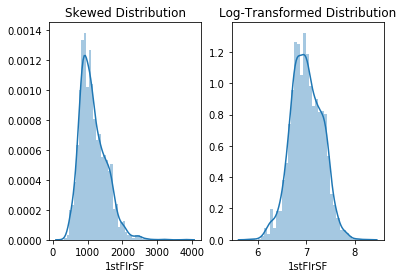

In [82]:
f, axarr = plt.subplots(1,2)
sns.distplot(df['1stFlrSF'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df['1stFlrSF']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

In [83]:
df[num_cols] = np.log(1+df[num_cols])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Log-Transformed Distribution')

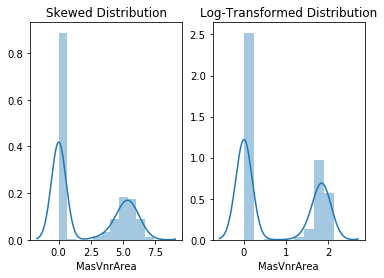

In [84]:
f, axarr = plt.subplots(1,2)
sns.distplot(df['MasVnrArea'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df['MasVnrArea']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

Note that with Gelman scaling, we are able to directly compoare dummie categorical features with significan variance to the numerical features

## Numerical featue standalization

In [85]:
df[num_cols]=scaler.fit_transform(df[num_cols])

## Get dummies

In [86]:
df = pd.get_dummies(df,drop_first=True)

In [87]:
df.shape

(2919, 613)

In [88]:
df_train_preprocess = df.iloc[:1460,:]
df_train_preprocess.shape

(1460, 613)

In [89]:
df_train_preprocess_x = df_train_preprocess.drop('SalePrice',axis=1)

In [90]:
df_test_preprocess = df.iloc[1460:2919,:]
df_test_preprocess.shape

(1459, 613)

## PCA to fit and transform data

In [91]:
pca_df_train_preprocess_x = PCA()
pca_df_train_preprocess_x.fit(df_train_preprocess_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

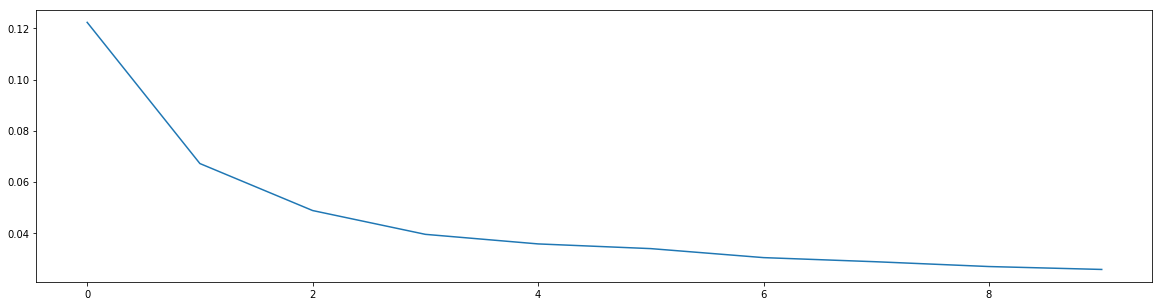

In [92]:
plt.figure(figsize=(20,5))
plt.plot(pca_df_train_preprocess_x.explained_variance_ratio_[:10])

In [93]:
pca_10 = PCA(n_components=10).fit(df_train_preprocess_x)
pca_10.explained_variance_ratio_

array([0.12240074, 0.06712148, 0.04872125, 0.03940489, 0.0356566 ,
       0.0338148 , 0.0302918 , 0.02866897, 0.02679726, 0.0256608 ])

In [94]:
df_train_preprocess_x.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,GarageArea,...,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.779970,1.196876,-0.112774,0.783621,-0.36306,1.135866,-0.251544,-0.326931,-0.427550,0.343736,...,0,0,0,0,0,0,0,1,0,0
2,0.431074,-0.863610,-0.112774,0.892865,-0.36306,-0.834451,3.888856,0.013448,-0.427550,0.222027,...,0,0,0,0,0,0,1,0,0,0
3,-0.555059,1.201129,-0.112774,0.658514,-0.36306,1.135866,-0.251544,0.240037,-0.427550,0.415995,...,0,0,0,0,0,0,0,1,0,0
4,-0.419048,1.159720,-0.112774,0.387212,-0.36306,1.135866,-0.251544,0.356893,2.753046,0.453843,...,0,0,0,0,0,0,0,0,0,0
5,0.127500,1.260739,-0.112774,0.758494,-0.36306,1.135866,-0.251544,0.304928,-0.427550,0.637541,...,0,0,0,0,0,0,0,1,0,0
